In [1]:
import gzip
import urllib.request as request
import pandas as pd
import io

In [2]:
def get_codes(dictionary):
      url_dict = "https://ec.europa.eu/eurostat/" + \
          "estat-navtree-portlet-prod/BulkDownloadListing" + \
          "?sort=1&downfile=dic%2Fen%2F" +\
          dictionary + ".dic"
      with request.urlopen(url_dict) as resp:
                file_content = resp.readlines()
      d={}
      for i in file_content:
            if len(i) > 1:
                  row=i.decode().split('\t')
                  d[row[0]] = row[1].strip()
      return d

In [3]:
def get_df(dataset):
    """ 
    dataset: choose the dataset code from:
https://ec.europa.eu/eurostat/databrowser/explore/all/all_themes?lang=en&display=list&sort=category
    something like EXT_LT_INTROEU27_2020
List of datasets for downloding: 
https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?dir=data&sort=1&sort=2&start=a
Returtn the cleaned dataset with decoded abbreviation

    """

    dataset = dataset.lower()
    url = "https://ec.europa.eu/eurostat/" + \
          "estat-navtree-portlet-prod/" + \
          "BulkDownloadListing?file=data%2F/" + \
          dataset + ".tsv.gz"

    with request.urlopen(url) as r:
            with gzip.GzipFile(fileobj=r) as data:
                file_content = data.read() #data read as binary from gzip
    # the approach to make the dataframe from the object with read data:
    # https://stackoverflow.com/questions/39213597/convert-text-data-from-requests-object-to-dataframe-with-pandas
    # the eurostat data contains not strict columns:first line with separator ',',the date columns - separator - '\t'
    df = pd.read_csv(io.StringIO(file_content.decode('utf-8')),sep=",|\t| [^ ]?\t", na_values=":",
                     engine="python",encoding='utf-8')
    #devide one column 'geo\\date'
    df.columns = [x.split('\\')[0].strip(' ') for x in df.columns]
    # use only file_content,not df,it is binary, so use decode()
    #file_content has the first row with the code we need to decode into names using function get_code
    codes=file_content.decode().split('\t')[0].split('\\')[0].split(',')
    for c in codes:
        df[c].replace(get_codes(c),inplace=True)
    return df

In [4]:
def clean_df(dataset_file):
    """ 
    use it if you have downloaded file
    https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?sort=1&dir=dic%2Fen
    """

   
    with gzip.open(dataset_file, 'rb') as f:
        file_content = f.read()
    df = pd.read_csv(io.StringIO(file_content.decode('utf-8')),sep=",|\t| [^ ]?\t", na_values=":",
                     engine="python",encoding='utf-8')
    df.columns = [x.split('\\')[0].strip(' ') for x in df.columns]
    codes=file_content.decode().split('\t')[0].split('\\')[0].split(',')
    for c in codes:
        df[c].replace(get_codes(c),inplace=True)
    return df

The first is to process the Final energy comsumption data

In [5]:
# full information from network, downloading for more than 3 minutes!!!
get_renew = get_df(dataset='NRG_BAL_C') # Final energy comsumption 
get_renew

,nrg_bal,siec,unit,geo,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Available for final consumption,Bioenergy,Gigawatt-hour,Albania,3013.181,3211.056,3129.617,2804.720,3049.733,2728.383,...,3046.944,3192.500,3344.722,3504.167,3671.389,3846.389,4029.722,4221.944,4221.944,4221.944
1,Available for final consumption,Bioenergy,Gigawatt-hour,Austria,54591.852,55571.298,55689.684,58228.039,57876.168,57507.590,...,31906.583,27778.728,28863.769,29117.247,27703.651,25186.310,27367.890,27110.141,27905.111,25744.633
2,Available for final consumption,Bioenergy,Gigawatt-hour,Bosnia and Herzegovina,14750.870,13990.576,13379.486,4843.579,5936.294,5937.175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Available for final consumption,Bioenergy,Gigawatt-hour,Belgium,27827.872,25799.034,27791.685,27165.203,26994.596,25412.611,...,5226.635,4792.250,4198.739,4464.628,4344.736,3076.269,3139.375,3958.904,4108.185,4034.103
4,Available for final consumption,Bioenergy,Gigawatt-hour,Bulgaria,18159.810,16781.094,16364.406,14661.761,14428.844,13753.572,...,4900.556,4759.722,2776.667,2724.166,2394.221,1865.723,1656.454,1818.057,1333.333,2005.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224175,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,Slovakia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z
1224176,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,Türkiye,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z
1224177,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z
1224178,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z


In [6]:
# transformation into DF
df_get_renew = pd.DataFrame(get_renew)
df_get_renew

,nrg_bal,siec,unit,geo,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Available for final consumption,Bioenergy,Gigawatt-hour,Albania,3013.181,3211.056,3129.617,2804.720,3049.733,2728.383,...,3046.944,3192.500,3344.722,3504.167,3671.389,3846.389,4029.722,4221.944,4221.944,4221.944
1,Available for final consumption,Bioenergy,Gigawatt-hour,Austria,54591.852,55571.298,55689.684,58228.039,57876.168,57507.590,...,31906.583,27778.728,28863.769,29117.247,27703.651,25186.310,27367.890,27110.141,27905.111,25744.633
2,Available for final consumption,Bioenergy,Gigawatt-hour,Bosnia and Herzegovina,14750.870,13990.576,13379.486,4843.579,5936.294,5937.175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Available for final consumption,Bioenergy,Gigawatt-hour,Belgium,27827.872,25799.034,27791.685,27165.203,26994.596,25412.611,...,5226.635,4792.250,4198.739,4464.628,4344.736,3076.269,3139.375,3958.904,4108.185,4034.103
4,Available for final consumption,Bioenergy,Gigawatt-hour,Bulgaria,18159.810,16781.094,16364.406,14661.761,14428.844,13753.572,...,4900.556,4759.722,2776.667,2724.166,2394.221,1865.723,1656.454,1818.057,1333.333,2005.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224175,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,Slovakia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z
1224176,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,Türkiye,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z
1224177,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z
1224178,Transformation output - refineries and petroch...,Non-renewable municipal waste,Terajoule,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,: z


In [7]:
df_get_renew.shape

(1224180, 35)

In [8]:
df_get_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224180 entries, 0 to 1224179
Data columns (total 35 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   nrg_bal  1224180 non-null  object 
 1   siec     1224180 non-null  object 
 2   unit     1224180 non-null  object 
 3   geo      1224180 non-null  object 
 4   2020     653130 non-null   float64
 5   2019     669060 non-null   float64
 6   2018     669060 non-null   float64
 7   2017     669060 non-null   float64
 8   2016     669060 non-null   float64
 9   2015     669060 non-null   float64
 10  2014     669060 non-null   float64
 11  2013     653130 non-null   float64
 12  2012     637200 non-null   float64
 13  2011     637200 non-null   float64
 14  2010     637200 non-null   float64
 15  2009     621270 non-null   float64
 16  2008     621270 non-null   float64
 17  2007     621270 non-null   float64
 18  2006     621270 non-null   float64
 19  2005     621270 non-null   float64
 20  20

All the further steps are taken to get final energy consumption for all countries from 2012 to 2020 in GWh  measurement unit

In [9]:
print(df_get_renew['nrg_bal'].unique())

['Available for final consumption' 'Distribution losses' 'Exports'
 'Final consumption - energy use'
 'Final consumption - industry sector - construction - energy use'
 'Final consumption - industry sector - chemical and petrochemical - energy use'
 'Final consumption - industry sector - energy use'
 'Final consumption - industry sector - food, beverages and tobacco - energy use'
 'Final consumption - industry sector - iron and steel - energy use'
 'Final consumption - industry sector - machinery - energy use'
 'Final consumption - industry sector - mining and quarrying - energy use'
 'Final consumption - industry sector - non-energy use'
 'Final consumption - industry sector - non-ferrous metals - energy use'
 'Final consumption - industry sector - non-metallic minerals - energy use'
 'Final consumption - industry sector - not elsewhere specified - energy use'
 'Final consumption - industry sector - paper, pulp and printing - energy use'
 'Final consumption - industry sector - transpo

In [10]:
df_get_renew["nrg_bal_obj"] = df_get_renew["nrg_bal"].astype(str)
df_get_renew.head()

,nrg_bal,siec,unit,geo,2020,2019,2018,2017,2016,2015,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,nrg_bal_obj
0,Available for final consumption,Bioenergy,Gigawatt-hour,Albania,3013.181,3211.056,3129.617,2804.720,3049.733,2728.383,...,3192.500,3344.722,3504.167,3671.389,3846.389,4029.722,4221.944,4221.944,4221.944,Available for final consumption
1,Available for final consumption,Bioenergy,Gigawatt-hour,Austria,54591.852,55571.298,55689.684,58228.039,57876.168,57507.590,...,27778.728,28863.769,29117.247,27703.651,25186.310,27367.890,27110.141,27905.111,25744.633,Available for final consumption
2,Available for final consumption,Bioenergy,Gigawatt-hour,Bosnia and Herzegovina,14750.870,13990.576,13379.486,4843.579,5936.294,5937.175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available for final consumption
3,Available for final consumption,Bioenergy,Gigawatt-hour,Belgium,27827.872,25799.034,27791.685,27165.203,26994.596,25412.611,...,4792.250,4198.739,4464.628,4344.736,3076.269,3139.375,3958.904,4108.185,4034.103,Available for final consumption
4,Available for final consumption,Bioenergy,Gigawatt-hour,Bulgaria,18159.810,16781.094,16364.406,14661.761,14428.844,13753.572,...,4759.722,2776.667,2724.166,2394.221,1865.723,1656.454,1818.057,1333.333,2005.833,Available for final consumption


In [11]:
df_get_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224180 entries, 0 to 1224179
Data columns (total 36 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   nrg_bal      1224180 non-null  object 
 1   siec         1224180 non-null  object 
 2   unit         1224180 non-null  object 
 3   geo          1224180 non-null  object 
 4   2020         653130 non-null   float64
 5   2019         669060 non-null   float64
 6   2018         669060 non-null   float64
 7   2017         669060 non-null   float64
 8   2016         669060 non-null   float64
 9   2015         669060 non-null   float64
 10  2014         669060 non-null   float64
 11  2013         653130 non-null   float64
 12  2012         637200 non-null   float64
 13  2011         637200 non-null   float64
 14  2010         637200 non-null   float64
 15  2009         621270 non-null   float64
 16  2008         621270 non-null   float64
 17  2007         621270 non-null   float64
 18  20

In [12]:
df_get_renew_fincon = df_get_renew.loc[df_get_renew['nrg_bal'] == 'Final consumption - energy use']
df_get_renew_fincon

,nrg_bal,siec,unit,geo,2020,2019,2018,2017,2016,2015,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,nrg_bal_obj
27120,Final consumption - energy use,Bioenergy,Gigawatt-hour,Albania,3080.264,3211.056,3129.617,2804.720,3049.733,2728.383,...,3192.500,3344.722,3504.167,3671.389,3846.389,4029.722,4221.944,4221.944,4221.944,Final consumption - energy use
27121,Final consumption - energy use,Bioenergy,Gigawatt-hour,Austria,54617.316,55603.307,55714.824,58250.872,57903.829,57534.736,...,27778.698,28863.741,29117.257,27703.637,25186.305,27367.955,27110.124,27905.100,25744.602,Final consumption - energy use
27122,Final consumption - energy use,Bioenergy,Gigawatt-hour,Bosnia and Herzegovina,14750.870,13990.576,13379.208,4843.852,5936.572,5919.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Final consumption - energy use
27123,Final consumption - energy use,Bioenergy,Gigawatt-hour,Belgium,28321.853,26215.905,28111.988,27509.906,27338.839,25723.481,...,4792.250,4198.739,4464.628,4344.736,3076.269,3139.375,3958.904,4108.185,4034.103,Final consumption - energy use
27124,Final consumption - energy use,Bioenergy,Gigawatt-hour,Bulgaria,18258.865,17015.287,16340.454,14731.810,14439.100,13761.236,...,4751.944,2723.611,2490.833,2277.554,1795.168,1560.620,1746.946,1333.333,2005.833,Final consumption - energy use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36139,Final consumption - energy use,Non-renewable municipal waste,Terajoule,Slovakia,515.000,440.000,8.000,419.000,71.000,550.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Final consumption - energy use
36140,Final consumption - energy use,Non-renewable municipal waste,Terajoule,Türkiye,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Final consumption - energy use
36141,Final consumption - energy use,Non-renewable municipal waste,Terajoule,Ukraine,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Final consumption - energy use
36142,Final consumption - energy use,Non-renewable municipal waste,Terajoule,United Kingdom,NaN,5475.000,5504.000,5275.000,4193.000,4709.000,...,286.000,186.000,673.000,656.000,605.000,525.000,531.000,571.000,536.000,Final consumption - energy use


In [13]:
print(df_get_renew_fincon['siec'].unique())

['Bioenergy' 'Solid fossil fuels' 'Anthracite' 'Coking coal'
 'Other bituminous coal' 'Sub-bituminous coal' 'Lignite' 'Coke oven coke'
 'Gas coke' 'Patent fuel' 'Brown coal briquettes' 'Coal tar'
 'Coke oven gas' 'Manufactured gases' 'Gas works gas' 'Blast furnace gas'
 'Other recovered gases' 'Electricity' 'Fossil energy' 'Natural gas'
 'Heat' 'Nuclear heat'
 'Oil and petroleum products (excluding biofuel portion)' 'Crude oil'
 'Natural gas liquids' 'Refinery feedstocks'
 'Additives and oxygenates (excluding biofuel portion)'
 'Other hydrocarbons' 'Refinery gas' 'Ethane' 'Liquefied petroleum gases'
 'Naphtha' 'Aviation gasoline'
 'Motor gasoline (excluding biofuel portion)' 'Gasoline-type jet fuel'
 'Kerosene-type jet fuel (excluding biofuel portion)' 'Other kerosene'
 'Gas oil and diesel oil (excluding biofuel portion)' 'Fuel oil'
 'White spirit and special boiling point industrial spirits' 'Lubricants'
 'Paraffin waxes' 'Petroleum coke' 'Bitumen' 'Other oil products n.e.c.'
 'Peat a

In [14]:
df_get_renew_fincon_total = df_get_renew_fincon.loc[df_get_renew_fincon['siec'] == 'Total']
df_get_renew_fincon_total

,nrg_bal,siec,unit,geo,2020,2019,2018,2017,2016,2015,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,nrg_bal_obj
35514,Final consumption - energy use,Total,Gigawatt-hour,Albania,21474.051,23876.813,24820.884,24177.936,22091.860,22823.850,...,10719.609,9611.654,11928.655,11037.049,10912.369,10922.459,11889.507,16371.327,22265.844,Final consumption - energy use
35515,Final consumption - energy use,Total,Gigawatt-hour,Austria,288624.871,305027.230,302830.312,308232.060,303542.303,296290.399,...,250415.878,243008.558,248958.967,229092.039,218885.178,224114.636,220061.112,225737.683,208914.111,Final consumption - energy use
35516,Final consumption - energy use,Total,Gigawatt-hour,Bosnia and Herzegovina,46804.808,48935.410,48984.752,40680.956,41215.947,38575.626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Final consumption - energy use
35517,Final consumption - energy use,Total,Gigawatt-hour,Belgium,360985.528,378903.241,385929.337,383395.441,388756.658,385533.434,...,387543.245,379346.273,387137.413,363532.757,353682.831,347129.988,350916.864,348200.881,330464.804,Final consumption - energy use
35518,Final consumption - energy use,Total,Gigawatt-hour,Bulgaria,110633.154,112889.753,113452.073,113344.852,110693.751,109188.868,...,115074.279,118430.761,128131.965,124760.205,118611.468,118097.784,121937.584,138556.553,185601.676,Final consumption - energy use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35635,Final consumption - energy use,Total,Terajoule,Slovakia,402389.827,429080.035,414975.319,414619.929,386263.255,374286.417,...,424205.646,431833.322,431327.049,416147.139,413354.335,427741.246,467297.483,494195.555,579625.615,Final consumption - energy use
35636,Final consumption - energy use,Total,Terajoule,Türkiye,4234655.450,4149124.802,4129566.302,4206687.475,3781439.427,3636109.261,...,2057017.821,2075910.541,2013489.806,1849464.822,1681540.137,1755022.630,1643811.562,1594908.427,1579015.317,Final consumption - energy use
35637,Final consumption - energy use,Total,Terajoule,Ukraine,1849905.636,1963041.095,2027153.668,1982273.606,2044254.858,1988233.954,...,3142668.197,3453304.235,3634193.392,3805233.320,3864933.924,4547103.552,5413258.133,6058287.220,6016449.244,Final consumption - energy use
35638,Final consumption - energy use,Total,Terajoule,United Kingdom,NaN,5083381.556,5132333.922,5063965.885,5103126.882,5026811.971,...,5720050.390,5689514.395,5823053.560,5512475.275,5532421.580,5536860.610,5449510.400,5552469.776,5308638.346,Final consumption - energy use


In [15]:
df_get_renew_fincon_total2 = df_get_renew_fincon_total.loc[df_get_renew_fincon_total['unit'] == 'Gigawatt-hour']
df_get_renew_fincon_total2

,nrg_bal,siec,unit,geo,2020,2019,2018,2017,2016,2015,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,nrg_bal_obj
35514,Final consumption - energy use,Total,Gigawatt-hour,Albania,2.147405e+04,2.387681e+04,2.482088e+04,2.417794e+04,2.209186e+04,2.282385e+04,...,1.071961e+04,9.611654e+03,1.192866e+04,1.103705e+04,1.091237e+04,1.092246e+04,1.188951e+04,1.637133e+04,22265.844,Final consumption - energy use
35515,Final consumption - energy use,Total,Gigawatt-hour,Austria,2.886249e+05,3.050272e+05,3.028303e+05,3.082321e+05,3.035423e+05,2.962904e+05,...,2.504159e+05,2.430086e+05,2.489590e+05,2.290920e+05,2.188852e+05,2.241146e+05,2.200611e+05,2.257377e+05,208914.111,Final consumption - energy use
35516,Final consumption - energy use,Total,Gigawatt-hour,Bosnia and Herzegovina,4.680481e+04,4.893541e+04,4.898475e+04,4.068096e+04,4.121595e+04,3.857563e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Final consumption - energy use
35517,Final consumption - energy use,Total,Gigawatt-hour,Belgium,3.609855e+05,3.789032e+05,3.859293e+05,3.833954e+05,3.887567e+05,3.855334e+05,...,3.875432e+05,3.793463e+05,3.871374e+05,3.635328e+05,3.536828e+05,3.471300e+05,3.509169e+05,3.482009e+05,330464.804,Final consumption - energy use
35518,Final consumption - energy use,Total,Gigawatt-hour,Bulgaria,1.106332e+05,1.128898e+05,1.134521e+05,1.133449e+05,1.106938e+05,1.091889e+05,...,1.150743e+05,1.184308e+05,1.281320e+05,1.247602e+05,1.186115e+05,1.180978e+05,1.219376e+05,1.385566e+05,185601.676,Final consumption - energy use
35519,Final consumption - energy use,Total,Gigawatt-hour,Cyprus,1.777713e+04,1.891797e+04,1.839021e+04,1.804448e+04,1.733575e+04,1.656022e+04,...,1.486154e+04,1.420454e+04,1.413870e+04,1.339741e+04,1.283463e+04,1.236588e+04,1.201241e+04,1.154712e+04,9920.896,Final consumption - energy use
35520,Final consumption - energy use,Total,Gigawatt-hour,Czechia,2.762517e+05,2.817057e+05,2.812842e+05,2.842431e+05,2.755215e+05,2.685820e+05,...,2.812574e+05,2.922413e+05,2.960390e+05,2.913721e+05,2.946954e+05,3.146788e+05,3.225512e+05,3.264464e+05,362561.850,Final consumption - energy use
35521,Final consumption - energy use,Total,Gigawatt-hour,Germany (until 1990 former territory of the FRG),2.251765e+06,2.335354e+06,2.333962e+06,2.378478e+06,2.368647e+06,2.326364e+06,...,2.490197e+06,2.508348e+06,2.560695e+06,2.449186e+06,2.410843e+06,2.467317e+06,2.447989e+06,2.526766e+06,2543117.158,Final consumption - energy use
35522,Final consumption - energy use,Total,Gigawatt-hour,Denmark,1.527109e+05,1.575483e+05,1.605762e+05,1.606873e+05,1.600788e+05,1.565707e+05,...,1.675543e+05,1.684460e+05,1.725896e+05,1.659242e+05,1.625817e+05,1.628754e+05,1.572489e+05,1.596496e+05,150321.500,Final consumption - energy use
35523,Final consumption - energy use,Total,Gigawatt-hour,Euro area - 19 countries (from 2015),8.026523e+06,8.591978e+06,8.630465e+06,8.650930e+06,8.580933e+06,8.445910e+06,...,8.590815e+06,8.438200e+06,8.510953e+06,8.156643e+06,7.993518e+06,8.067753e+06,8.081861e+06,8.237822e+06,8038571.044,Final consumption - energy use


In [16]:
df_get_renew_fincon_total_last = df_get_renew_fincon_total2.loc['35514':'35555','geo':'2012']
df_get_renew_fincon_total_last

,geo,2020,2019,2018,2017,2016,2015,2014,2013,2012
35514,Albania,2.147405e+04,2.387681e+04,2.482088e+04,2.417794e+04,2.209186e+04,2.282385e+04,2.394122e+04,2.281655e+04,2.082494e+04
35515,Austria,2.886249e+05,3.050272e+05,3.028303e+05,3.082321e+05,3.035423e+05,2.962904e+05,2.879859e+05,3.000607e+05,2.931221e+05
35516,Bosnia and Herzegovina,4.680481e+04,4.893541e+04,4.898475e+04,4.068096e+04,4.121595e+04,3.857563e+04,3.609515e+04,NaN,NaN
35517,Belgium,3.609855e+05,3.789032e+05,3.859293e+05,3.833954e+05,3.887567e+05,3.855334e+05,3.672835e+05,3.961131e+05,3.838927e+05
35518,Bulgaria,1.106332e+05,1.128898e+05,1.134521e+05,1.133449e+05,1.106938e+05,1.091889e+05,1.032919e+05,1.009572e+05,1.058722e+05
35519,Cyprus,1.777713e+04,1.891797e+04,1.839021e+04,1.804448e+04,1.733575e+04,1.656022e+04,1.601855e+04,1.596165e+04,1.736125e+04
35520,Czechia,2.762517e+05,2.817057e+05,2.812842e+05,2.842431e+05,2.755215e+05,2.685820e+05,2.609707e+05,2.689594e+05,2.712320e+05
35521,Germany (until 1990 former territory of the FRG),2.251765e+06,2.335354e+06,2.333962e+06,2.378478e+06,2.368647e+06,2.326364e+06,2.293773e+06,2.419708e+06,2.356965e+06
35522,Denmark,1.527109e+05,1.575483e+05,1.605762e+05,1.606873e+05,1.600788e+05,1.565707e+05,1.504057e+05,1.565516e+05,1.583135e+05
35523,Euro area - 19 countries (from 2015),8.026523e+06,8.591978e+06,8.630465e+06,8.650930e+06,8.580933e+06,8.445910e+06,8.279002e+06,8.704211e+06,8.682039e+06


In [17]:
df_get_renew_fincon_total_last = df_get_renew_fincon_total_last.reset_index(drop=True)
df_get_renew_fincon_total_last

,geo,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Albania,2.147405e+04,2.387681e+04,2.482088e+04,2.417794e+04,2.209186e+04,2.282385e+04,2.394122e+04,2.281655e+04,2.082494e+04
1,Austria,2.886249e+05,3.050272e+05,3.028303e+05,3.082321e+05,3.035423e+05,2.962904e+05,2.879859e+05,3.000607e+05,2.931221e+05
2,Bosnia and Herzegovina,4.680481e+04,4.893541e+04,4.898475e+04,4.068096e+04,4.121595e+04,3.857563e+04,3.609515e+04,NaN,NaN
3,Belgium,3.609855e+05,3.789032e+05,3.859293e+05,3.833954e+05,3.887567e+05,3.855334e+05,3.672835e+05,3.961131e+05,3.838927e+05
4,Bulgaria,1.106332e+05,1.128898e+05,1.134521e+05,1.133449e+05,1.106938e+05,1.091889e+05,1.032919e+05,1.009572e+05,1.058722e+05
5,Cyprus,1.777713e+04,1.891797e+04,1.839021e+04,1.804448e+04,1.733575e+04,1.656022e+04,1.601855e+04,1.596165e+04,1.736125e+04
6,Czechia,2.762517e+05,2.817057e+05,2.812842e+05,2.842431e+05,2.755215e+05,2.685820e+05,2.609707e+05,2.689594e+05,2.712320e+05
7,Germany (until 1990 former territory of the FRG),2.251765e+06,2.335354e+06,2.333962e+06,2.378478e+06,2.368647e+06,2.326364e+06,2.293773e+06,2.419708e+06,2.356965e+06
8,Denmark,1.527109e+05,1.575483e+05,1.605762e+05,1.606873e+05,1.600788e+05,1.565707e+05,1.504057e+05,1.565516e+05,1.583135e+05
9,Euro area - 19 countries (from 2015),8.026523e+06,8.591978e+06,8.630465e+06,8.650930e+06,8.580933e+06,8.445910e+06,8.279002e+06,8.704211e+06,8.682039e+06


In [18]:
df_get_renew_fincon_total_last.set_index('geo', inplace=True) 
df_get_renew_fincon_total_last

,2020,2019,2018,2017,2016,2015,2014,2013,2012
geo,,,,,,,,,
Albania,2.147405e+04,2.387681e+04,2.482088e+04,2.417794e+04,2.209186e+04,2.282385e+04,2.394122e+04,2.281655e+04,2.082494e+04
Austria,2.886249e+05,3.050272e+05,3.028303e+05,3.082321e+05,3.035423e+05,2.962904e+05,2.879859e+05,3.000607e+05,2.931221e+05
Bosnia and Herzegovina,4.680481e+04,4.893541e+04,4.898475e+04,4.068096e+04,4.121595e+04,3.857563e+04,3.609515e+04,NaN,NaN
Belgium,3.609855e+05,3.789032e+05,3.859293e+05,3.833954e+05,3.887567e+05,3.855334e+05,3.672835e+05,3.961131e+05,3.838927e+05
Bulgaria,1.106332e+05,1.128898e+05,1.134521e+05,1.133449e+05,1.106938e+05,1.091889e+05,1.032919e+05,1.009572e+05,1.058722e+05
Cyprus,1.777713e+04,1.891797e+04,1.839021e+04,1.804448e+04,1.733575e+04,1.656022e+04,1.601855e+04,1.596165e+04,1.736125e+04
Czechia,2.762517e+05,2.817057e+05,2.812842e+05,2.842431e+05,2.755215e+05,2.685820e+05,2.609707e+05,2.689594e+05,2.712320e+05
Germany (until 1990 former territory of the FRG),2.251765e+06,2.335354e+06,2.333962e+06,2.378478e+06,2.368647e+06,2.326364e+06,2.293773e+06,2.419708e+06,2.356965e+06
Denmark,1.527109e+05,1.575483e+05,1.605762e+05,1.606873e+05,1.600788e+05,1.565707e+05,1.504057e+05,1.565516e+05,1.583135e+05


In [19]:

df_get_renew_fincon_total_last = df_get_renew_fincon_total_last[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
df_get_renew_fincon_total_last

,2012,2013,2014,2015,2016,2017,2018,2019,2020
geo,,,,,,,,,
Albania,2.082494e+04,2.281655e+04,2.394122e+04,2.282385e+04,2.209186e+04,2.417794e+04,2.482088e+04,2.387681e+04,2.147405e+04
Austria,2.931221e+05,3.000607e+05,2.879859e+05,2.962904e+05,3.035423e+05,3.082321e+05,3.028303e+05,3.050272e+05,2.886249e+05
Bosnia and Herzegovina,NaN,NaN,3.609515e+04,3.857563e+04,4.121595e+04,4.068096e+04,4.898475e+04,4.893541e+04,4.680481e+04
Belgium,3.838927e+05,3.961131e+05,3.672835e+05,3.855334e+05,3.887567e+05,3.833954e+05,3.859293e+05,3.789032e+05,3.609855e+05
Bulgaria,1.058722e+05,1.009572e+05,1.032919e+05,1.091889e+05,1.106938e+05,1.133449e+05,1.134521e+05,1.128898e+05,1.106332e+05
Cyprus,1.736125e+04,1.596165e+04,1.601855e+04,1.656022e+04,1.733575e+04,1.804448e+04,1.839021e+04,1.891797e+04,1.777713e+04
Czechia,2.712320e+05,2.689594e+05,2.609707e+05,2.685820e+05,2.755215e+05,2.842431e+05,2.812842e+05,2.817057e+05,2.762517e+05
Germany (until 1990 former territory of the FRG),2.356965e+06,2.419708e+06,2.293773e+06,2.326364e+06,2.368647e+06,2.378478e+06,2.333962e+06,2.335354e+06,2.251765e+06
Denmark,1.583135e+05,1.565516e+05,1.504057e+05,1.565707e+05,1.600788e+05,1.606873e+05,1.605762e+05,1.575483e+05,1.527109e+05


In [20]:
# this is the final table I got for futher visualisation
df_get_renew_fincon_total_last_trans = df_get_renew_fincon_total_last.T
df_get_renew_fincon_total_last_trans

geo,Albania,Austria,Bosnia and Herzegovina,Belgium,Bulgaria,Cyprus,Czechia,Germany (until 1990 former territory of the FRG),Denmark,Euro area - 19 countries (from 2015),...,Portugal,Romania,Serbia,Sweden,Slovenia,Slovakia,Türkiye,Ukraine,United Kingdom,Kosovo (under United Nations Security Council Resolution 1244/99)
2012,20824.945,293122.137,NaN,383892.650,105872.176,17361.253,271232.039,2356965.292,158313.544,8682038.597,...,175747.771,263177.218,97834.969,375783.591,57101.178,106978.148,920612.405,772279.393,1426519.457,14181.294
2013,22816.554,300060.664,NaN,396113.064,100957.206,15961.653,268959.413,2419707.803,156551.560,8704211.429,...,173383.735,251572.314,95385.555,368340.459,55873.193,109463.001,912568.698,757625.493,1435088.648,13578.934
2014,23941.215,287985.855,36095.152,367283.461,103291.851,16018.554,260970.747,2293773.490,150405.746,8279001.860,...,178943.690,249700.374,89337.149,359702.233,53591.224,101651.892,940219.127,673305.177,1355988.652,14313.046
2015,22823.850,296290.399,38575.626,385533.434,109188.868,16560.224,268582.033,2326363.971,156570.676,8445910.093,...,180856.675,251210.797,91712.848,366472.330,54838.275,103968.449,1010030.350,552287.209,1396336.659,15583.361
2016,22091.860,303542.303,41215.947,388756.658,110693.751,17335.750,275521.455,2368646.992,160078.788,8580932.636,...,181901.796,255106.956,95440.788,372598.234,56913.244,107295.349,1050399.841,567848.572,1417535.245,16666.215
2017,24177.936,308232.060,40680.956,383395.441,113344.852,18044.478,284243.065,2378477.963,160687.340,8650930.437,...,184925.111,267259.190,97264.464,370413.727,57672.936,115172.203,1168524.298,550631.557,1406657.190,17631.823
2018,24820.884,302830.312,48984.752,385929.337,113452.073,18390.206,281284.245,2333961.821,160576.170,8630465.209,...,187876.587,272662.921,98099.457,369010.578,57600.223,115270.922,1147101.750,563098.241,1425648.312,17108.031
2019,23876.813,305027.230,48935.410,378903.241,112889.753,18917.965,281705.716,2335354.497,157548.312,8591977.931,...,190224.237,275778.159,97238.474,364075.095,56554.593,119188.899,1152534.667,545289.193,1412050.432,17620.974
2020,21474.051,288624.871,46804.808,360985.528,110633.154,17777.130,276251.734,2251765.205,152710.872,8026522.519,...,176952.427,272983.777,100696.470,365813.706,51507.402,111774.952,1176293.181,513862.677,NaN,17731.951


In [21]:
df_get_renew_fincon_total_last_trans.columns

Index(['Albania', 'Austria', 'Bosnia and Herzegovina', 'Belgium', 'Bulgaria',
       'Cyprus', 'Czechia', 'Germany (until 1990 former territory of the FRG)',
       'Denmark', 'Euro area - 19 countries  (from 2015)', 'Estonia', 'Greece',
       'Spain', 'European Union - 27 countries (from 2020)', 'Finland',
       'France', 'Georgia', 'Croatia', 'Hungary', 'Ireland', 'Iceland',
       'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Moldova', 'Montenegro',
       'North Macedonia', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Sweden', 'Slovenia', 'Slovakia',
       'Türkiye', 'Ukraine', 'United Kingdom',
       'Kosovo (under United Nations Security Council Resolution 1244/99)'],
      dtype='object', name='geo')

In [22]:
df_get_renew_fincon_total_last_trans.rename(columns = {'geo':'year'}, inplace = True)
df_get_renew_fincon_total_last_trans

geo,Albania,Austria,Bosnia and Herzegovina,Belgium,Bulgaria,Cyprus,Czechia,Germany (until 1990 former territory of the FRG),Denmark,Euro area - 19 countries (from 2015),...,Portugal,Romania,Serbia,Sweden,Slovenia,Slovakia,Türkiye,Ukraine,United Kingdom,Kosovo (under United Nations Security Council Resolution 1244/99)
2012,20824.945,293122.137,NaN,383892.650,105872.176,17361.253,271232.039,2356965.292,158313.544,8682038.597,...,175747.771,263177.218,97834.969,375783.591,57101.178,106978.148,920612.405,772279.393,1426519.457,14181.294
2013,22816.554,300060.664,NaN,396113.064,100957.206,15961.653,268959.413,2419707.803,156551.560,8704211.429,...,173383.735,251572.314,95385.555,368340.459,55873.193,109463.001,912568.698,757625.493,1435088.648,13578.934
2014,23941.215,287985.855,36095.152,367283.461,103291.851,16018.554,260970.747,2293773.490,150405.746,8279001.860,...,178943.690,249700.374,89337.149,359702.233,53591.224,101651.892,940219.127,673305.177,1355988.652,14313.046
2015,22823.850,296290.399,38575.626,385533.434,109188.868,16560.224,268582.033,2326363.971,156570.676,8445910.093,...,180856.675,251210.797,91712.848,366472.330,54838.275,103968.449,1010030.350,552287.209,1396336.659,15583.361
2016,22091.860,303542.303,41215.947,388756.658,110693.751,17335.750,275521.455,2368646.992,160078.788,8580932.636,...,181901.796,255106.956,95440.788,372598.234,56913.244,107295.349,1050399.841,567848.572,1417535.245,16666.215
2017,24177.936,308232.060,40680.956,383395.441,113344.852,18044.478,284243.065,2378477.963,160687.340,8650930.437,...,184925.111,267259.190,97264.464,370413.727,57672.936,115172.203,1168524.298,550631.557,1406657.190,17631.823
2018,24820.884,302830.312,48984.752,385929.337,113452.073,18390.206,281284.245,2333961.821,160576.170,8630465.209,...,187876.587,272662.921,98099.457,369010.578,57600.223,115270.922,1147101.750,563098.241,1425648.312,17108.031
2019,23876.813,305027.230,48935.410,378903.241,112889.753,18917.965,281705.716,2335354.497,157548.312,8591977.931,...,190224.237,275778.159,97238.474,364075.095,56554.593,119188.899,1152534.667,545289.193,1412050.432,17620.974
2020,21474.051,288624.871,46804.808,360985.528,110633.154,17777.130,276251.734,2251765.205,152710.872,8026522.519,...,176952.427,272983.777,100696.470,365813.706,51507.402,111774.952,1176293.181,513862.677,NaN,17731.951


In [23]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from matplotlib import ticker

<AxesSubplot: title={'center': 'Final energy capacity'}>

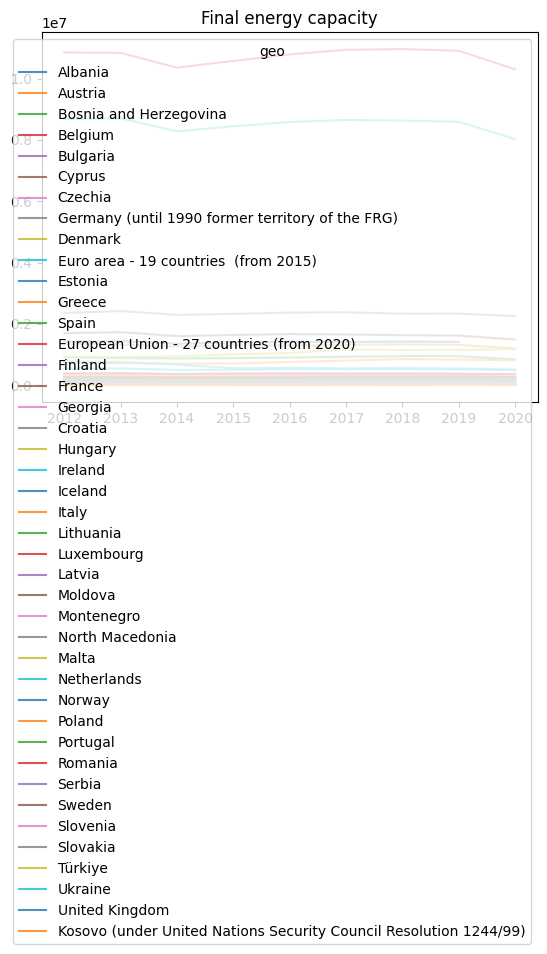

In [24]:
df_get_renew_fincon_total_last_trans.plot(title='Final energy capacity', xlabel='', ylabel='', alpha=0.8)

In [25]:
df_get_renew_fincon_total_threeyears = df_get_renew_fincon_total_last.loc['Albania':'Kosovo (under United Nations Security Council Resolution 1244/99)', '2018':'2020']
df_get_renew_fincon_total_threeyears

,2018,2019,2020
geo,,,
Albania,2.482088e+04,2.387681e+04,2.147405e+04
Austria,3.028303e+05,3.050272e+05,2.886249e+05
Bosnia and Herzegovina,4.898475e+04,4.893541e+04,4.680481e+04
Belgium,3.859293e+05,3.789032e+05,3.609855e+05
Bulgaria,1.134521e+05,1.128898e+05,1.106332e+05
Cyprus,1.839021e+04,1.891797e+04,1.777713e+04
Czechia,2.812842e+05,2.817057e+05,2.762517e+05
Germany (until 1990 former territory of the FRG),2.333962e+06,2.335354e+06,2.251765e+06
Denmark,1.605762e+05,1.575483e+05,1.527109e+05


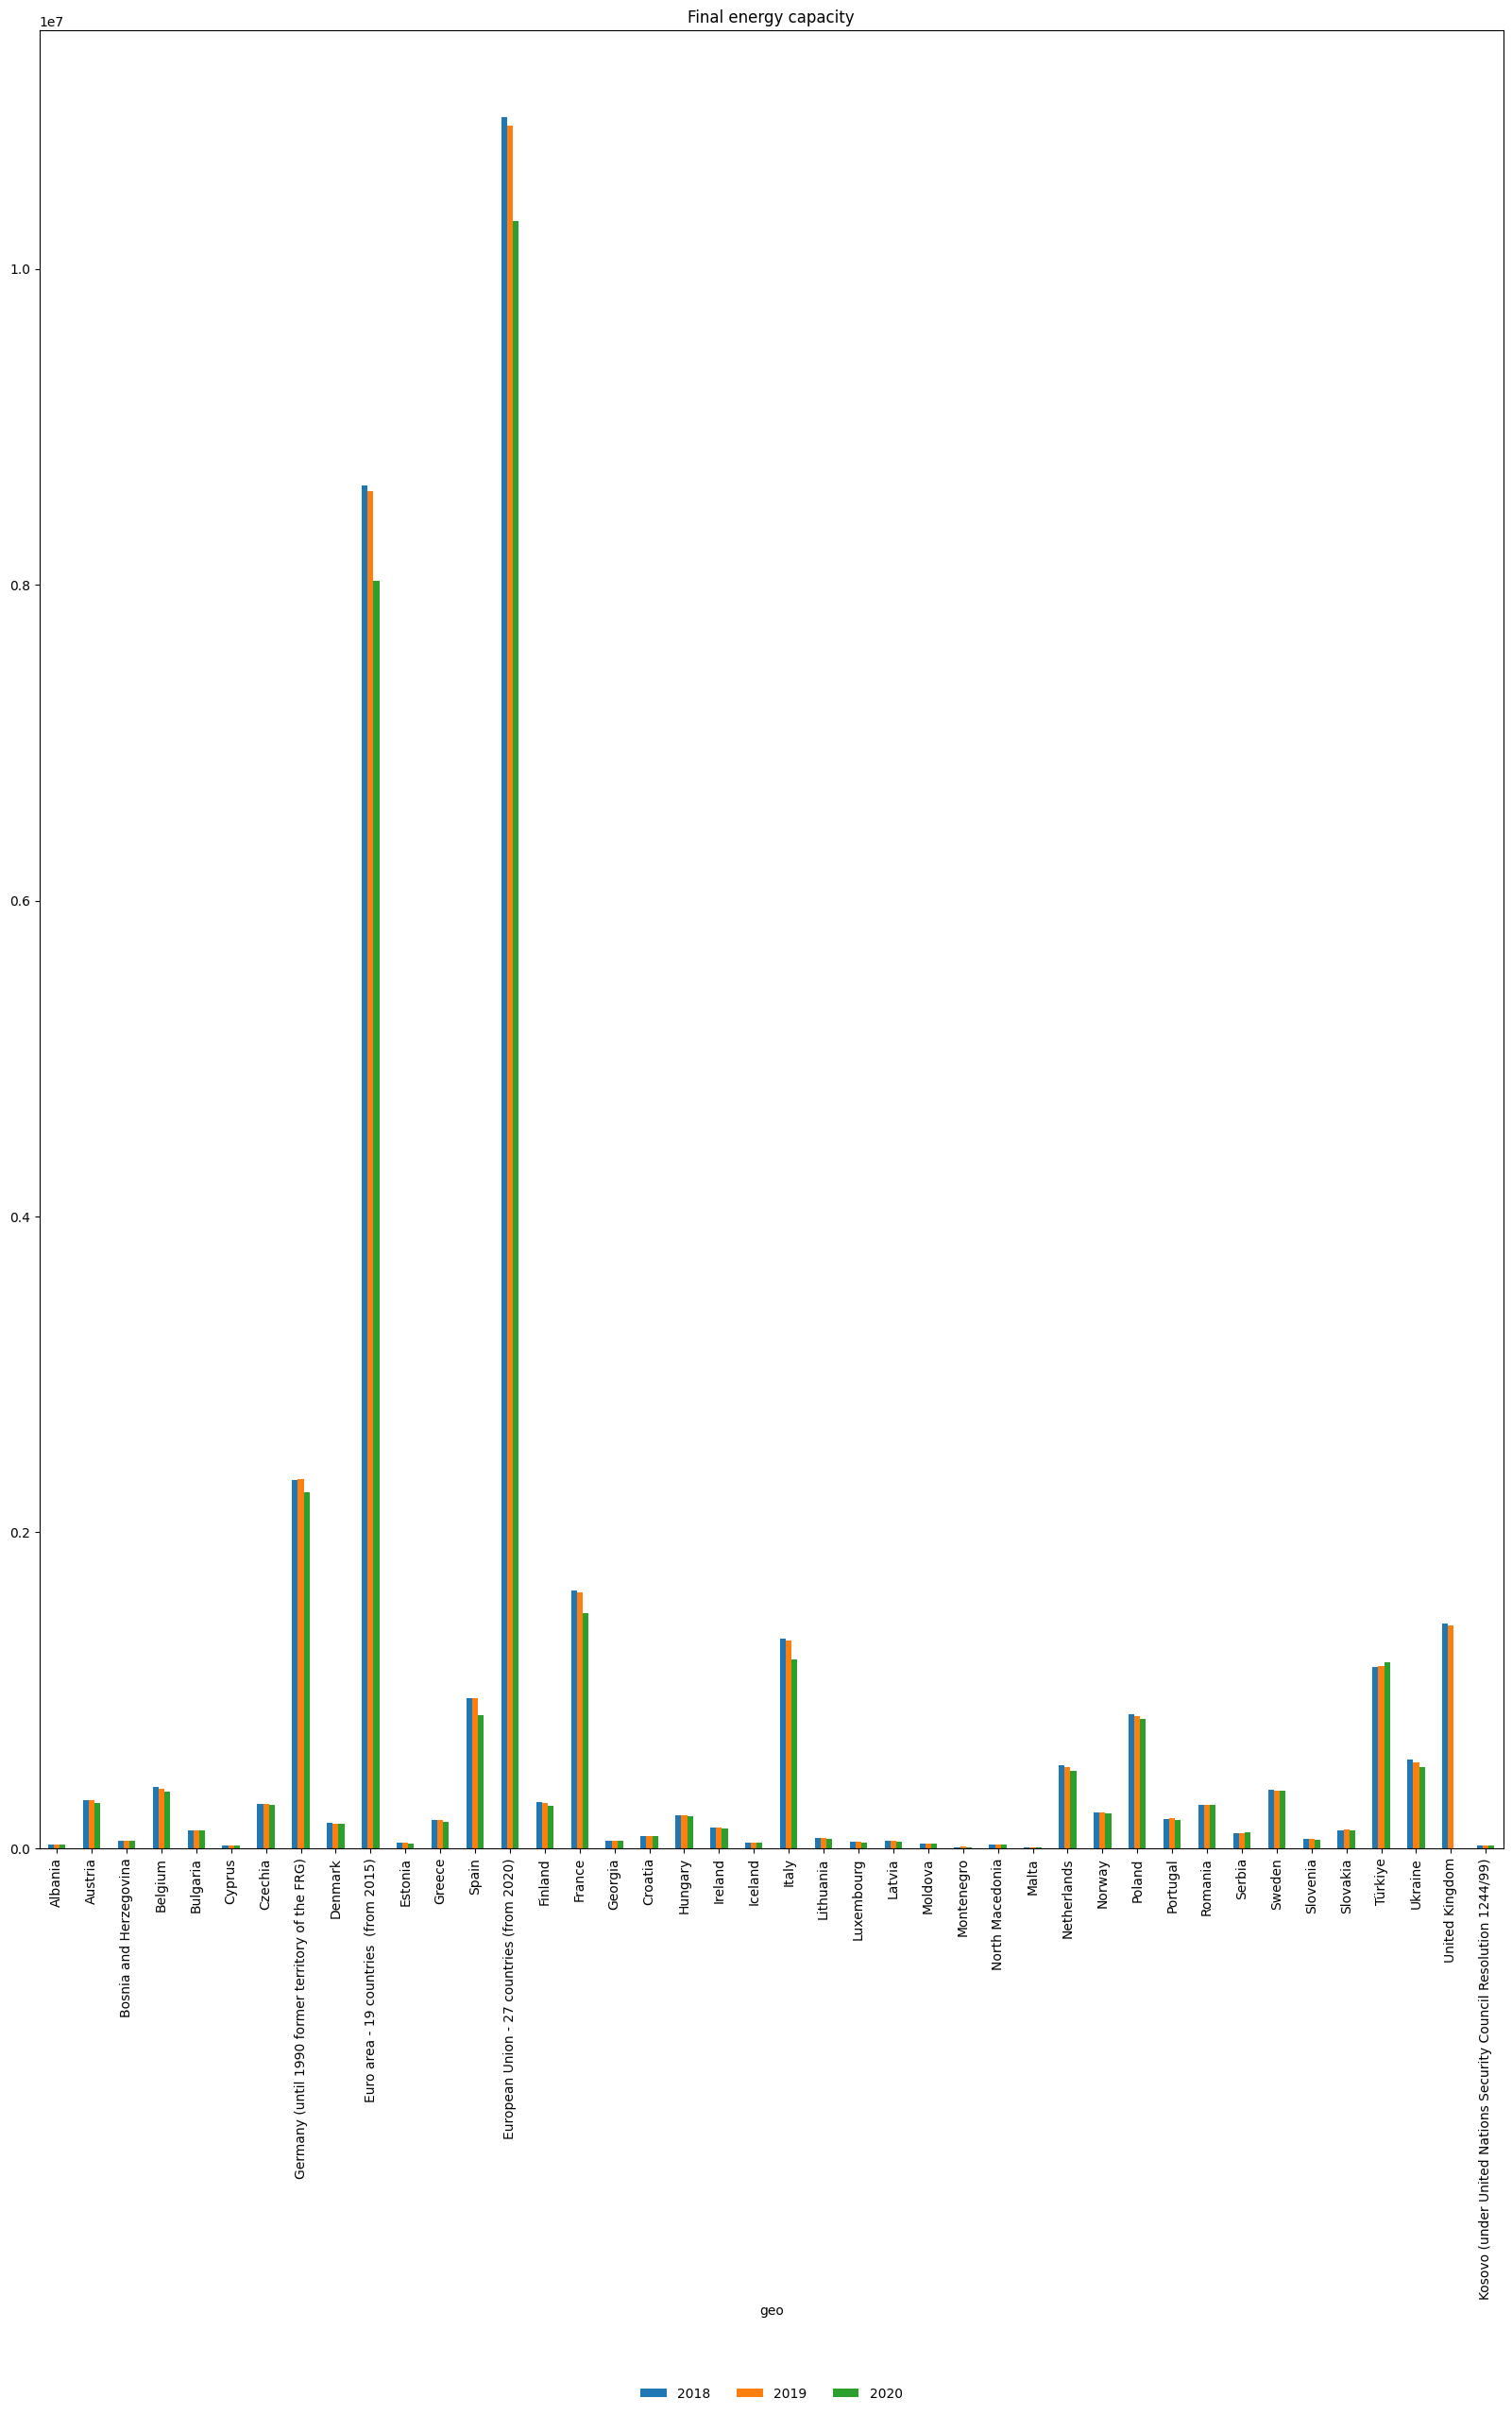

In [26]:

ax = df_get_renew_fincon_total_threeyears.plot(
    kind='bar', rot=0, xlabel='geo', ylabel='',
    figsize=(8, 1.5), title='Final energy capacity'
)

ax.tick_params(axis='x', labelrotation = 90)

ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)

ax.figure.set_size_inches(20, 25) 

In [27]:
df_get_renew_fincon_total_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Albania to Kosovo (under United Nations Security Council Resolution 1244/99)
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2012    40 non-null     float64
 1   2013    41 non-null     float64
 2   2014    42 non-null     float64
 3   2015    42 non-null     float64
 4   2016    42 non-null     float64
 5   2017    42 non-null     float64
 6   2018    42 non-null     float64
 7   2019    42 non-null     float64
 8   2020    41 non-null     float64
dtypes: float64(9)
memory usage: 4.3+ KB


In [ ]:
# plot dynamics of energy consumption for all the countries

In [ ]:
# probably, heatmap could be useful also for visualisation

The next step is to get Electricity production capacities for renewables and wastes

In [28]:
# the names of the adata frames should be further changed with places  - get_renew for this part and get_energy for the previous one 
get_energy = get_df(dataset='NRG_INF_EPCRW') # Electricity production capacities for renewables and wastes
get_energy.head(5)

,siec,plant_tec,unit,geo,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Solid biofuels,Net maximum electrical capacity,Megawatt,Albania,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Solid biofuels,Net maximum electrical capacity,Megawatt,Austria,816.199,813.428,824.253,837.771,916.695,938.621,...,787.0,747.0,609.0,607.0,544.0,412.0,412.0,400.0,400.0,400.0
2,Solid biofuels,Net maximum electrical capacity,Megawatt,Bosnia and Herzegovina,1.120,1.220,0.250,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Solid biofuels,Net maximum electrical capacity,Megawatt,Belgium,563.500,539.200,526.300,559.200,566.300,591.300,...,38.0,18.0,11.0,19.0,23.0,11.0,11.0,18.0,26.0,26.0
4,Solid biofuels,Net maximum electrical capacity,Megawatt,Bulgaria,15.064,23.513,33.019,22.973,19.000,34.000,...,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_get_energy = pd.DataFrame(get_energy)
df_get_energy.head()

,siec,plant_tec,unit,geo,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Solid biofuels,Net maximum electrical capacity,Megawatt,Albania,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Solid biofuels,Net maximum electrical capacity,Megawatt,Austria,816.199,813.428,824.253,837.771,916.695,938.621,...,787.0,747.0,609.0,607.0,544.0,412.0,412.0,400.0,400.0,400.0
2,Solid biofuels,Net maximum electrical capacity,Megawatt,Bosnia and Herzegovina,1.120,1.220,0.250,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Solid biofuels,Net maximum electrical capacity,Megawatt,Belgium,563.500,539.200,526.300,559.200,566.300,591.300,...,38.0,18.0,11.0,19.0,23.0,11.0,11.0,18.0,26.0,26.0
4,Solid biofuels,Net maximum electrical capacity,Megawatt,Bulgaria,15.064,23.513,33.019,22.973,19.000,34.000,...,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_get_energy.shape

(1075, 35)

In [31]:
df_get_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   siec       1075 non-null   object 
 1   plant_tec  1075 non-null   object 
 2   unit       1075 non-null   object 
 3   geo        1075 non-null   object 
 4   2020       1050 non-null   float64
 5   2019       1074 non-null   float64
 6   2018       1075 non-null   float64
 7   2017       1075 non-null   float64
 8   2016       1075 non-null   float64
 9   2015       1075 non-null   float64
 10  2014       1075 non-null   float64
 11  2013       1025 non-null   float64
 12  2012       1000 non-null   float64
 13  2011       1000 non-null   float64
 14  2010       1000 non-null   float64
 15  2009       975 non-null    float64
 16  2008       975 non-null    float64
 17  2007       975 non-null    float64
 18  2006       975 non-null    float64
 19  2005       975 non-null    float64
 20  2004    

In [32]:
print(df_get_energy['siec'].unique())

['Solid biofuels' 'Pure biogasoline' 'Pure biodiesels'
 'Other liquid biofuels' 'Biogases' 'Hydro' 'Pure hydro power'
 'Run-of-river hydro power' 'Mixed hydro power' 'Pumped hydro power'
 'Geothermal' 'Wind' 'Wind on shore' 'Wind off shore' 'Solar'
 'Solar thermal' 'Solar photovoltaic'
 'Solar photovoltaic (20 kW - 1000 kW)' 'Solar photovoltaic (< 20 kW)'
 'Solar photovoltaic (1+ MW)' 'Solar photovoltaic (Off grid)'
 'Tide, wave, ocean' 'Waste' 'Industrial waste (non-renewable)'
 'Municipal waste']


In [33]:
df_get_energy_solar = df_get_energy.loc[df_get_energy['siec'] == 'Solar']
df_get_energy_solar.head()

,siec,plant_tec,unit,geo,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
602,Solar,Net maximum electrical capacity,Megawatt,Albania,21.000,14.000,1.000,1.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,Solar,Net maximum electrical capacity,Megawatt,Austria,2042.934,1702.093,1455.132,1268.971,1096.016,937.098,...,4.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
604,Solar,Net maximum electrical capacity,Megawatt,Bosnia and Herzegovina,34.890,22.350,18.150,16.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,Solar,Net maximum electrical capacity,Megawatt,Belgium,5574.800,4636.600,4000.000,3620.600,3328.800,3131.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,Solar,Net maximum electrical capacity,Megawatt,Bulgaria,1097.357,1047.950,1032.679,1035.570,1028.000,1029.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_get_energy_solar_last = df_get_energy_solar.loc['602':'644','geo':'2012']
df_get_energy_solar_last.head()

,geo,2020,2019,2018,2017,2016,2015,2014,2013,2012
602,Albania,21.000,14.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
603,Austria,2042.934,1702.093,1455.132,1268.971,1096.016,937.098,785.246,625.974,337.483
604,Bosnia and Herzegovina,34.890,22.350,18.150,16.000,0.000,0.000,0.000,NaN,NaN
605,Belgium,5574.800,4636.600,4000.000,3620.600,3328.800,3131.600,3015.000,2901.600,2646.600
606,Bulgaria,1097.357,1047.950,1032.679,1035.570,1028.000,1029.000,1026.000,1020.000,1013.000


In [36]:
df_get_energy_solar_last.set_index('geo', inplace=True) 
df_get_energy_solar_true = df_get_energy_solar_last[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
df_get_energy_solar_true.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020
geo,,,,,,,,,
Albania,0.000,0.000,0.000,0.000,0.000,1.000,1.000,14.000,21.000
Austria,337.483,625.974,785.246,937.098,1096.016,1268.971,1455.132,1702.093,2042.934
Bosnia and Herzegovina,NaN,NaN,0.000,0.000,0.000,16.000,18.150,22.350,34.890
Belgium,2646.600,2901.600,3015.000,3131.600,3328.800,3620.600,4000.000,4636.600,5574.800
Bulgaria,1013.000,1020.000,1026.000,1029.000,1028.000,1035.570,1032.679,1047.950,1097.357


In [37]:
df_get_energy_solar_trans = df_get_energy_solar_true.T
df_get_energy_solar_trans

geo,Albania,Austria,Bosnia and Herzegovina,Belgium,Bulgaria,Cyprus,Czechia,Germany (until 1990 former territory of the FRG),Denmark,Euro area - 19 countries (from 2015),...,Portugal,Romania,Serbia,Sweden,Slovenia,Slovakia,Türkiye,Ukraine,United Kingdom,Kosovo (under United Nations Security Council Resolution 1244/99)
2012,0.0,337.483,NaN,2646.6,1013.000,17.000,2022.000,34077.0,402.000,67613.131,...,238.000,41.000,0.0,24.0,142.000,513.0,0.000,319.0,1753.000,0.000
2013,0.0,625.974,NaN,2901.6,1020.000,35.000,2063.500,36710.0,571.000,75175.464,...,296.000,761.000,0.0,43.0,187.000,533.0,0.000,612.0,2937.000,0.000
2014,0.0,785.246,0.00,3015.0,1026.000,64.000,2067.400,37900.0,607.000,78413.889,...,415.000,1293.000,6.0,60.0,223.000,533.0,40.000,411.0,5528.000,0.000
2015,0.0,937.098,0.00,3131.6,1029.000,76.000,2074.900,39224.0,782.108,82042.702,...,447.000,1326.000,9.0,104.0,238.000,533.0,249.000,423.0,9601.219,0.000
2016,0.0,1096.016,0.00,3328.8,1028.000,84.000,2067.900,40679.0,850.953,85548.897,...,512.824,1372.000,11.0,153.0,233.000,533.0,833.000,425.0,11914.000,1.950
2017,1.0,1268.971,16.00,3620.6,1035.570,110.046,2069.500,42293.0,906.350,89911.096,...,579.236,1374.199,10.0,244.0,246.800,528.0,3420.700,758.6,12760.000,6.602
2018,1.0,1455.132,18.15,4000.0,1032.679,118.479,2075.072,45158.0,998.000,96774.914,...,667.431,1385.911,11.0,428.0,246.800,472.0,5062.608,1201.0,13073.000,6.602
2019,14.0,1702.093,22.35,4636.6,1047.950,151.261,2086.424,48914.0,1080.000,110871.587,...,901.438,1397.796,11.0,714.0,277.877,590.0,5995.155,1953.0,13346.000,10.000
2020,21.0,2042.934,34.89,5574.8,1097.357,229.134,2122.711,53721.0,1304.294,125234.232,...,1100.292,1382.630,11.5,1107.0,369.780,535.0,6667.418,5194.0,NaN,10.000


<AxesSubplot: title={'center': 'Solar energy capacity'}>

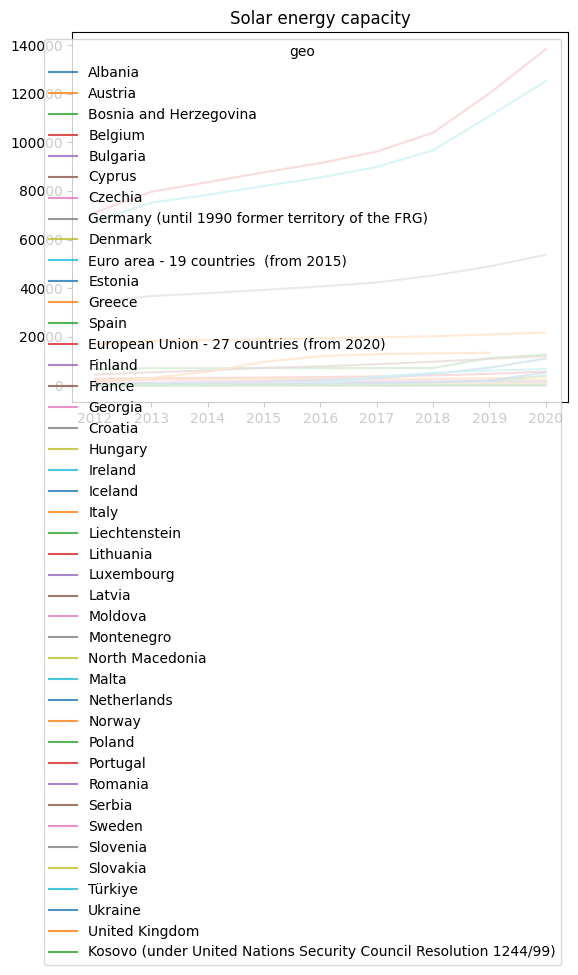

In [38]:

df_get_energy_solar_trans
df_get_energy_solar_trans.plot(title='Solar energy capacity', xlabel='', ylabel='', alpha=0.8)

In [39]:
df_get_energy_solar_threeyears = df_get_energy_solar_true.loc['Albania':'Kosovo (under United Nations Security Council Resolution 1244/99)', '2018':'2020']
df_get_energy_solar_threeyears.head()

,2018,2019,2020
geo,,,
Albania,1.000,14.000,21.000
Austria,1455.132,1702.093,2042.934
Bosnia and Herzegovina,18.150,22.350,34.890
Belgium,4000.000,4636.600,5574.800
Bulgaria,1032.679,1047.950,1097.357


In [40]:
df_get_energy_solar_2020 = df_get_energy_solar_threeyears[['2020']]
df_get_energy_solar_2020.head()

,2020
geo,
Albania,21.000
Austria,2042.934
Bosnia and Herzegovina,34.890
Belgium,5574.800
Bulgaria,1097.357


In [41]:
df_get_energy_solar_2020_GWh = pd.DataFrame(df_get_energy_solar_2020['2020'].multiply(8.76))
df_get_energy_solar_2020_GWh

,2020
geo,
Albania,1.839600e+02
Austria,1.789610e+04
Bosnia and Herzegovina,3.056364e+02
Belgium,4.883525e+04
Bulgaria,9.612847e+03
Cyprus,2.007214e+03
Czechia,1.859495e+04
Germany (until 1990 former territory of the FRG),4.705960e+05
Denmark,1.142562e+04


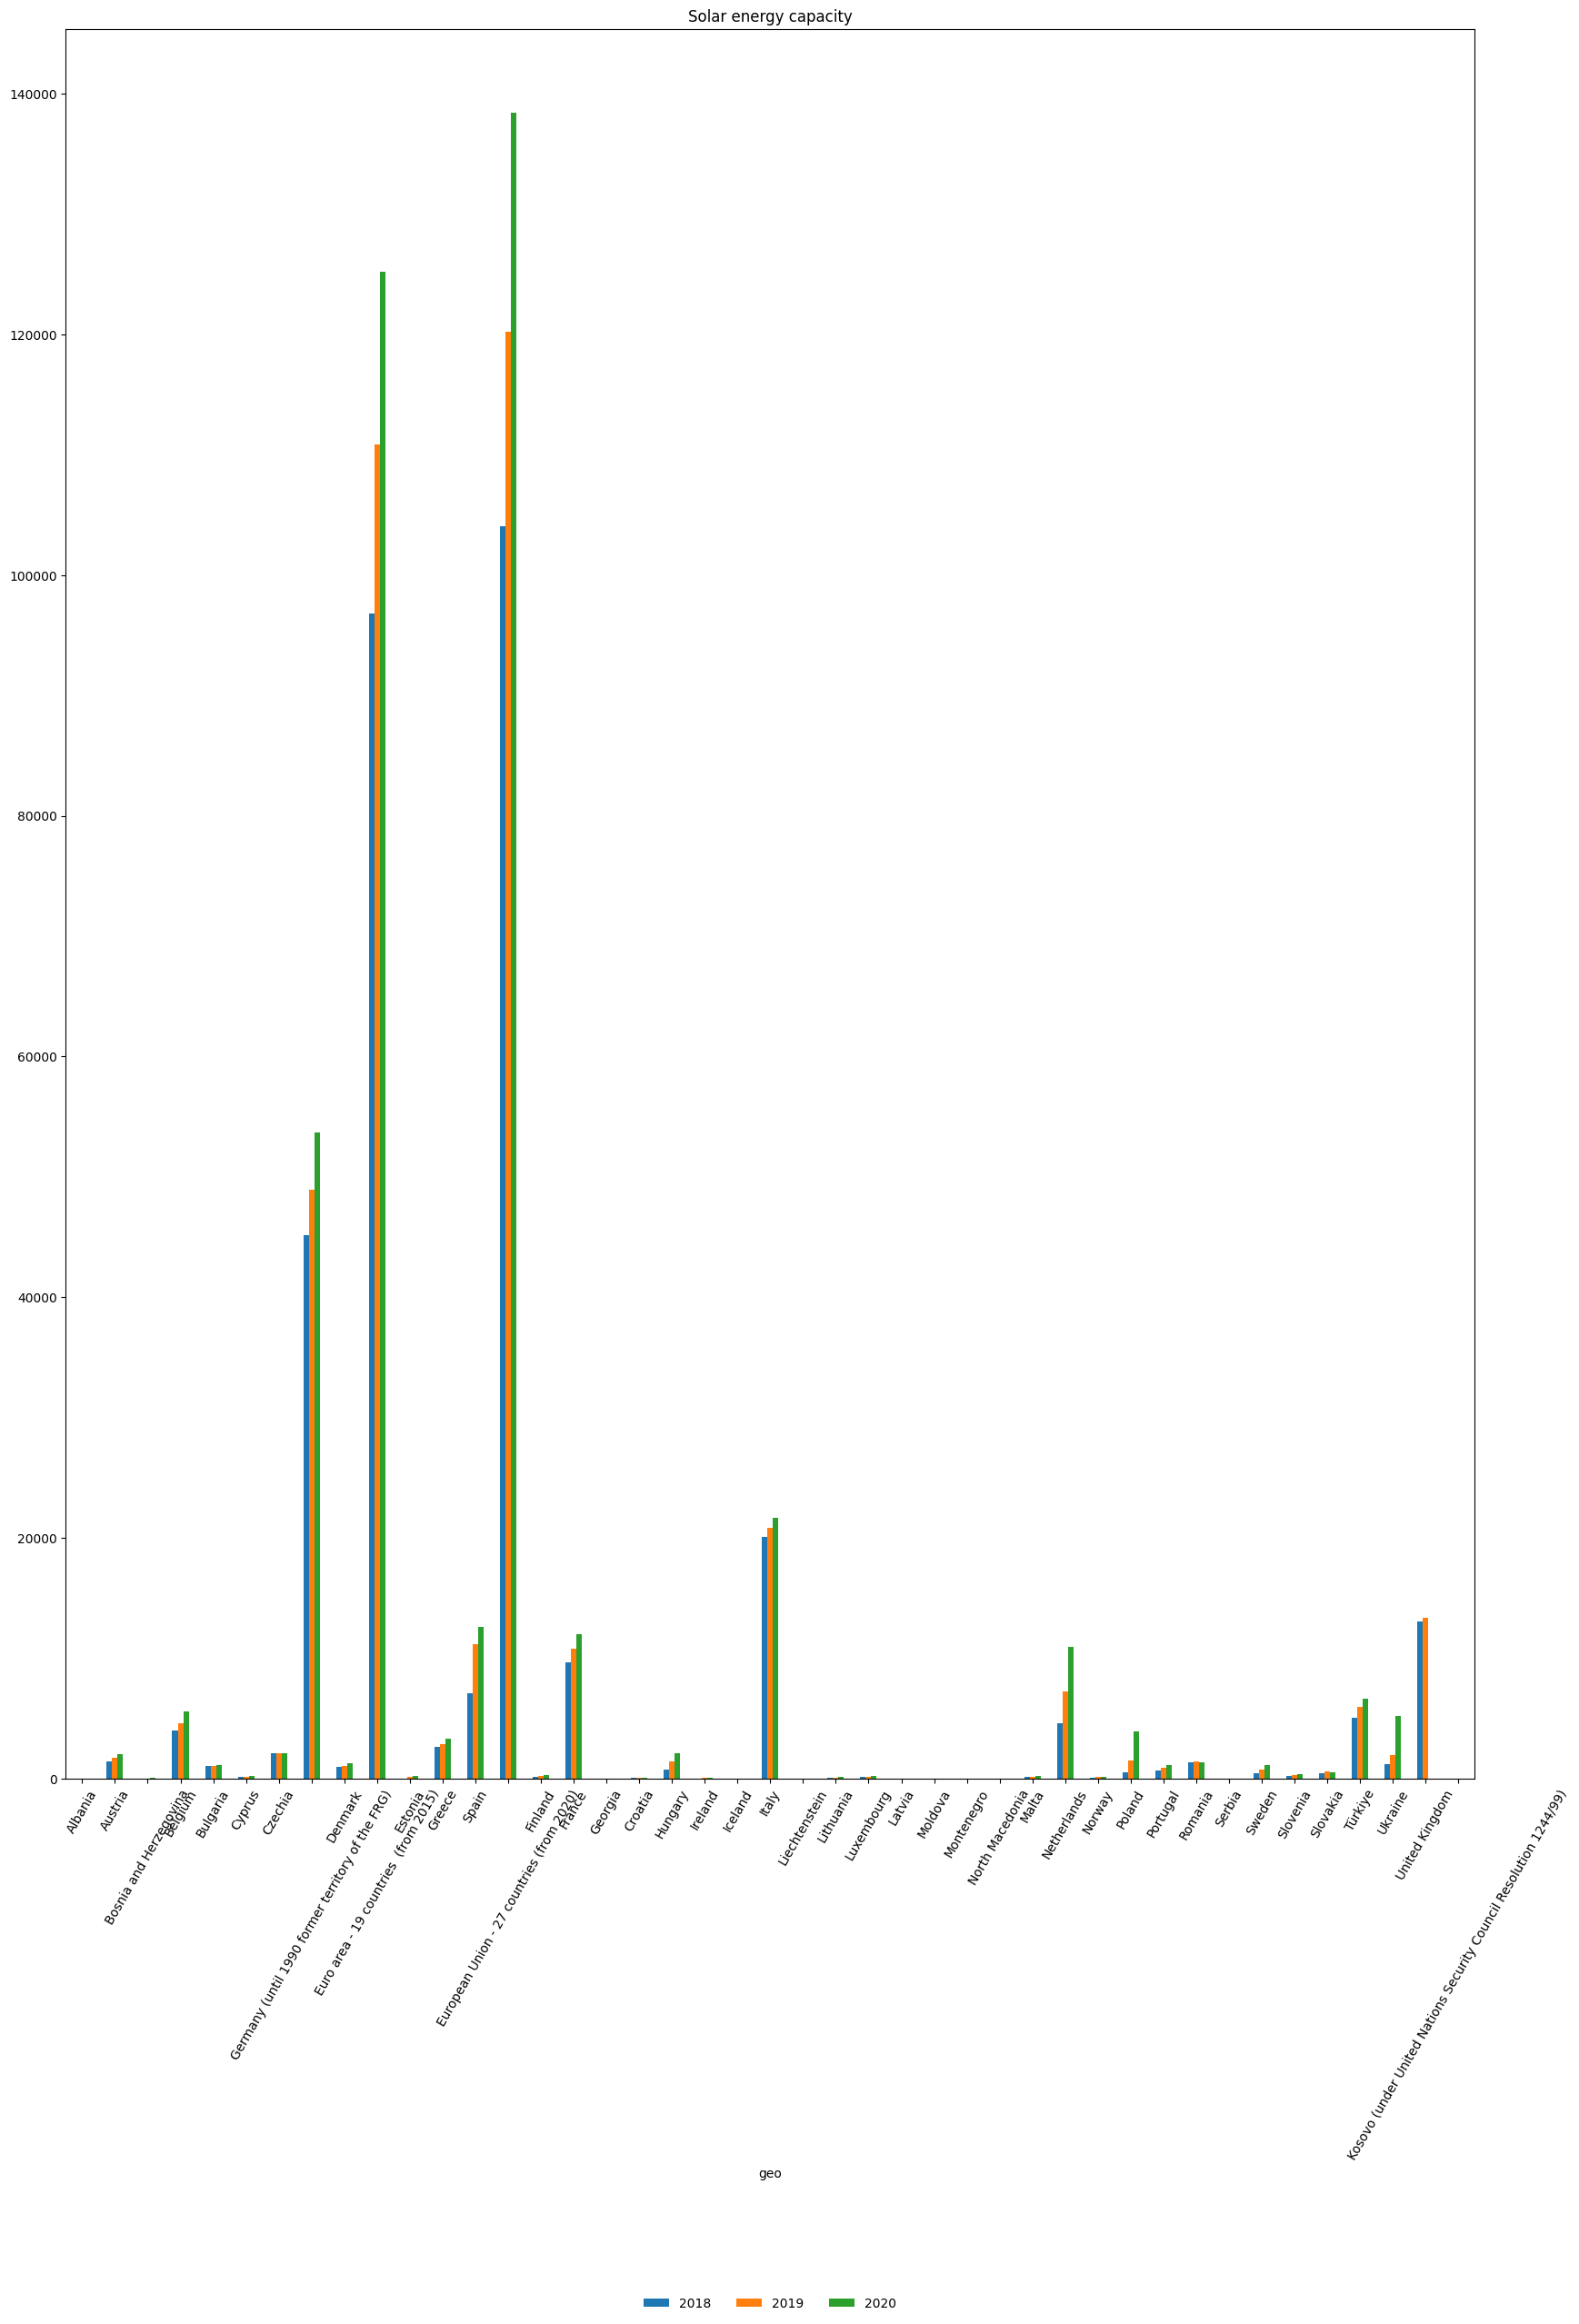

In [42]:


ax = df_get_energy_solar_threeyears.plot(
    kind='bar', rot=0, xlabel='geo', ylabel='',
    figsize=(8, 1.5), title='Solar energy capacity'
)

ax.tick_params(axis='x', labelrotation = 60)

ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)

ax.figure.set_size_inches(20, 25) 

In [43]:
df_get_energy_wind = df_get_energy.loc[df_get_energy['siec'] == 'Wind']
df_get_energy_wind.head()

,siec,plant_tec,unit,geo,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
473,Wind,Net maximum electrical capacity,Megawatt,Albania,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474,Wind,Net maximum electrical capacity,Megawatt,Austria,3225.985,3224.117,3132.713,2886.698,2729.996,2488.726,...,38.0,34.0,15.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0
475,Wind,Net maximum electrical capacity,Megawatt,Bosnia and Herzegovina,87.000,87.000,51.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,Wind,Net maximum electrical capacity,Megawatt,Belgium,4680.900,3863.400,3267.900,2787.500,2370.000,2176.000,...,10.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
477,Wind,Net maximum electrical capacity,Megawatt,Bulgaria,702.800,703.120,698.920,698.390,699.000,699.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_get_energy_wind_last = df_get_energy_wind.loc['473':'515','geo':'2012']
df_get_energy_wind_last.head()

,geo,2020,2019,2018,2017,2016,2015,2014,2013,2012
473,Albania,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
474,Austria,3225.985,3224.117,3132.713,2886.698,2729.996,2488.726,2110.275,1674.538,1337.15
475,Bosnia and Herzegovina,87.000,87.000,51.000,0.000,0.000,0.000,0.000,NaN,NaN
476,Belgium,4680.900,3863.400,3267.900,2787.500,2370.000,2176.000,1944.000,1780.000,1370.00
477,Bulgaria,702.800,703.120,698.920,698.390,699.000,699.000,699.000,683.000,677.00


In [45]:
df_get_energy_wind_last.set_index('geo', inplace=True) 
df_get_energy_wind_true = df_get_energy_wind_last[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
df_get_energy_wind_true.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020
geo,,,,,,,,,
Albania,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Austria,1337.15,1674.538,2110.275,2488.726,2729.996,2886.698,3132.713,3224.117,3225.985
Bosnia and Herzegovina,NaN,NaN,0.000,0.000,0.000,0.000,51.000,87.000,87.000
Belgium,1370.00,1780.000,1944.000,2176.000,2370.000,2787.500,3267.900,3863.400,4680.900
Bulgaria,677.00,683.000,699.000,699.000,699.000,698.390,698.920,703.120,702.800


<AxesSubplot: title={'center': 'Wind energy capacity'}>

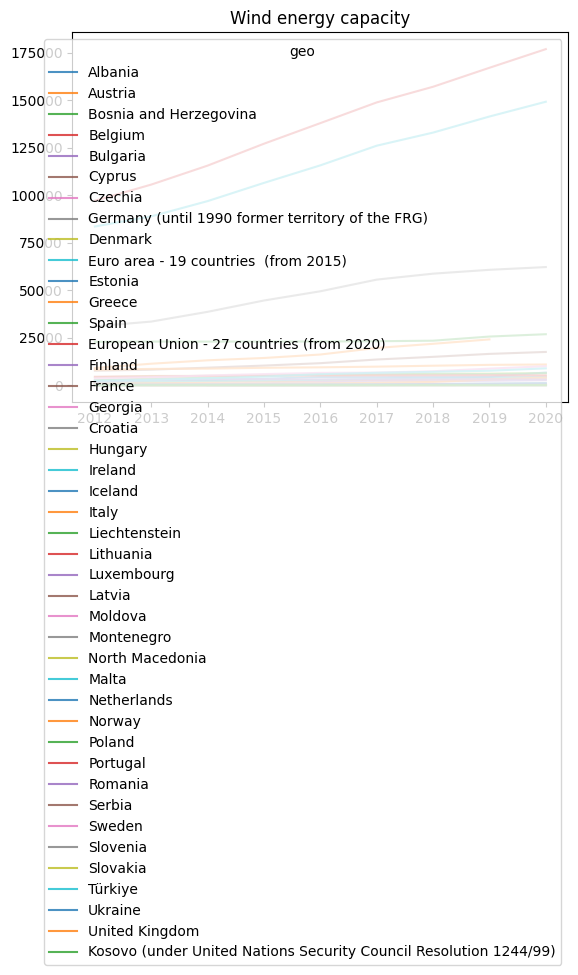

In [46]:
df_get_energy_wind_trans = df_get_energy_wind_true.T
df_get_energy_wind_trans
df_get_energy_wind_trans.plot(title='Wind energy capacity', xlabel='', ylabel='', alpha=0.8)

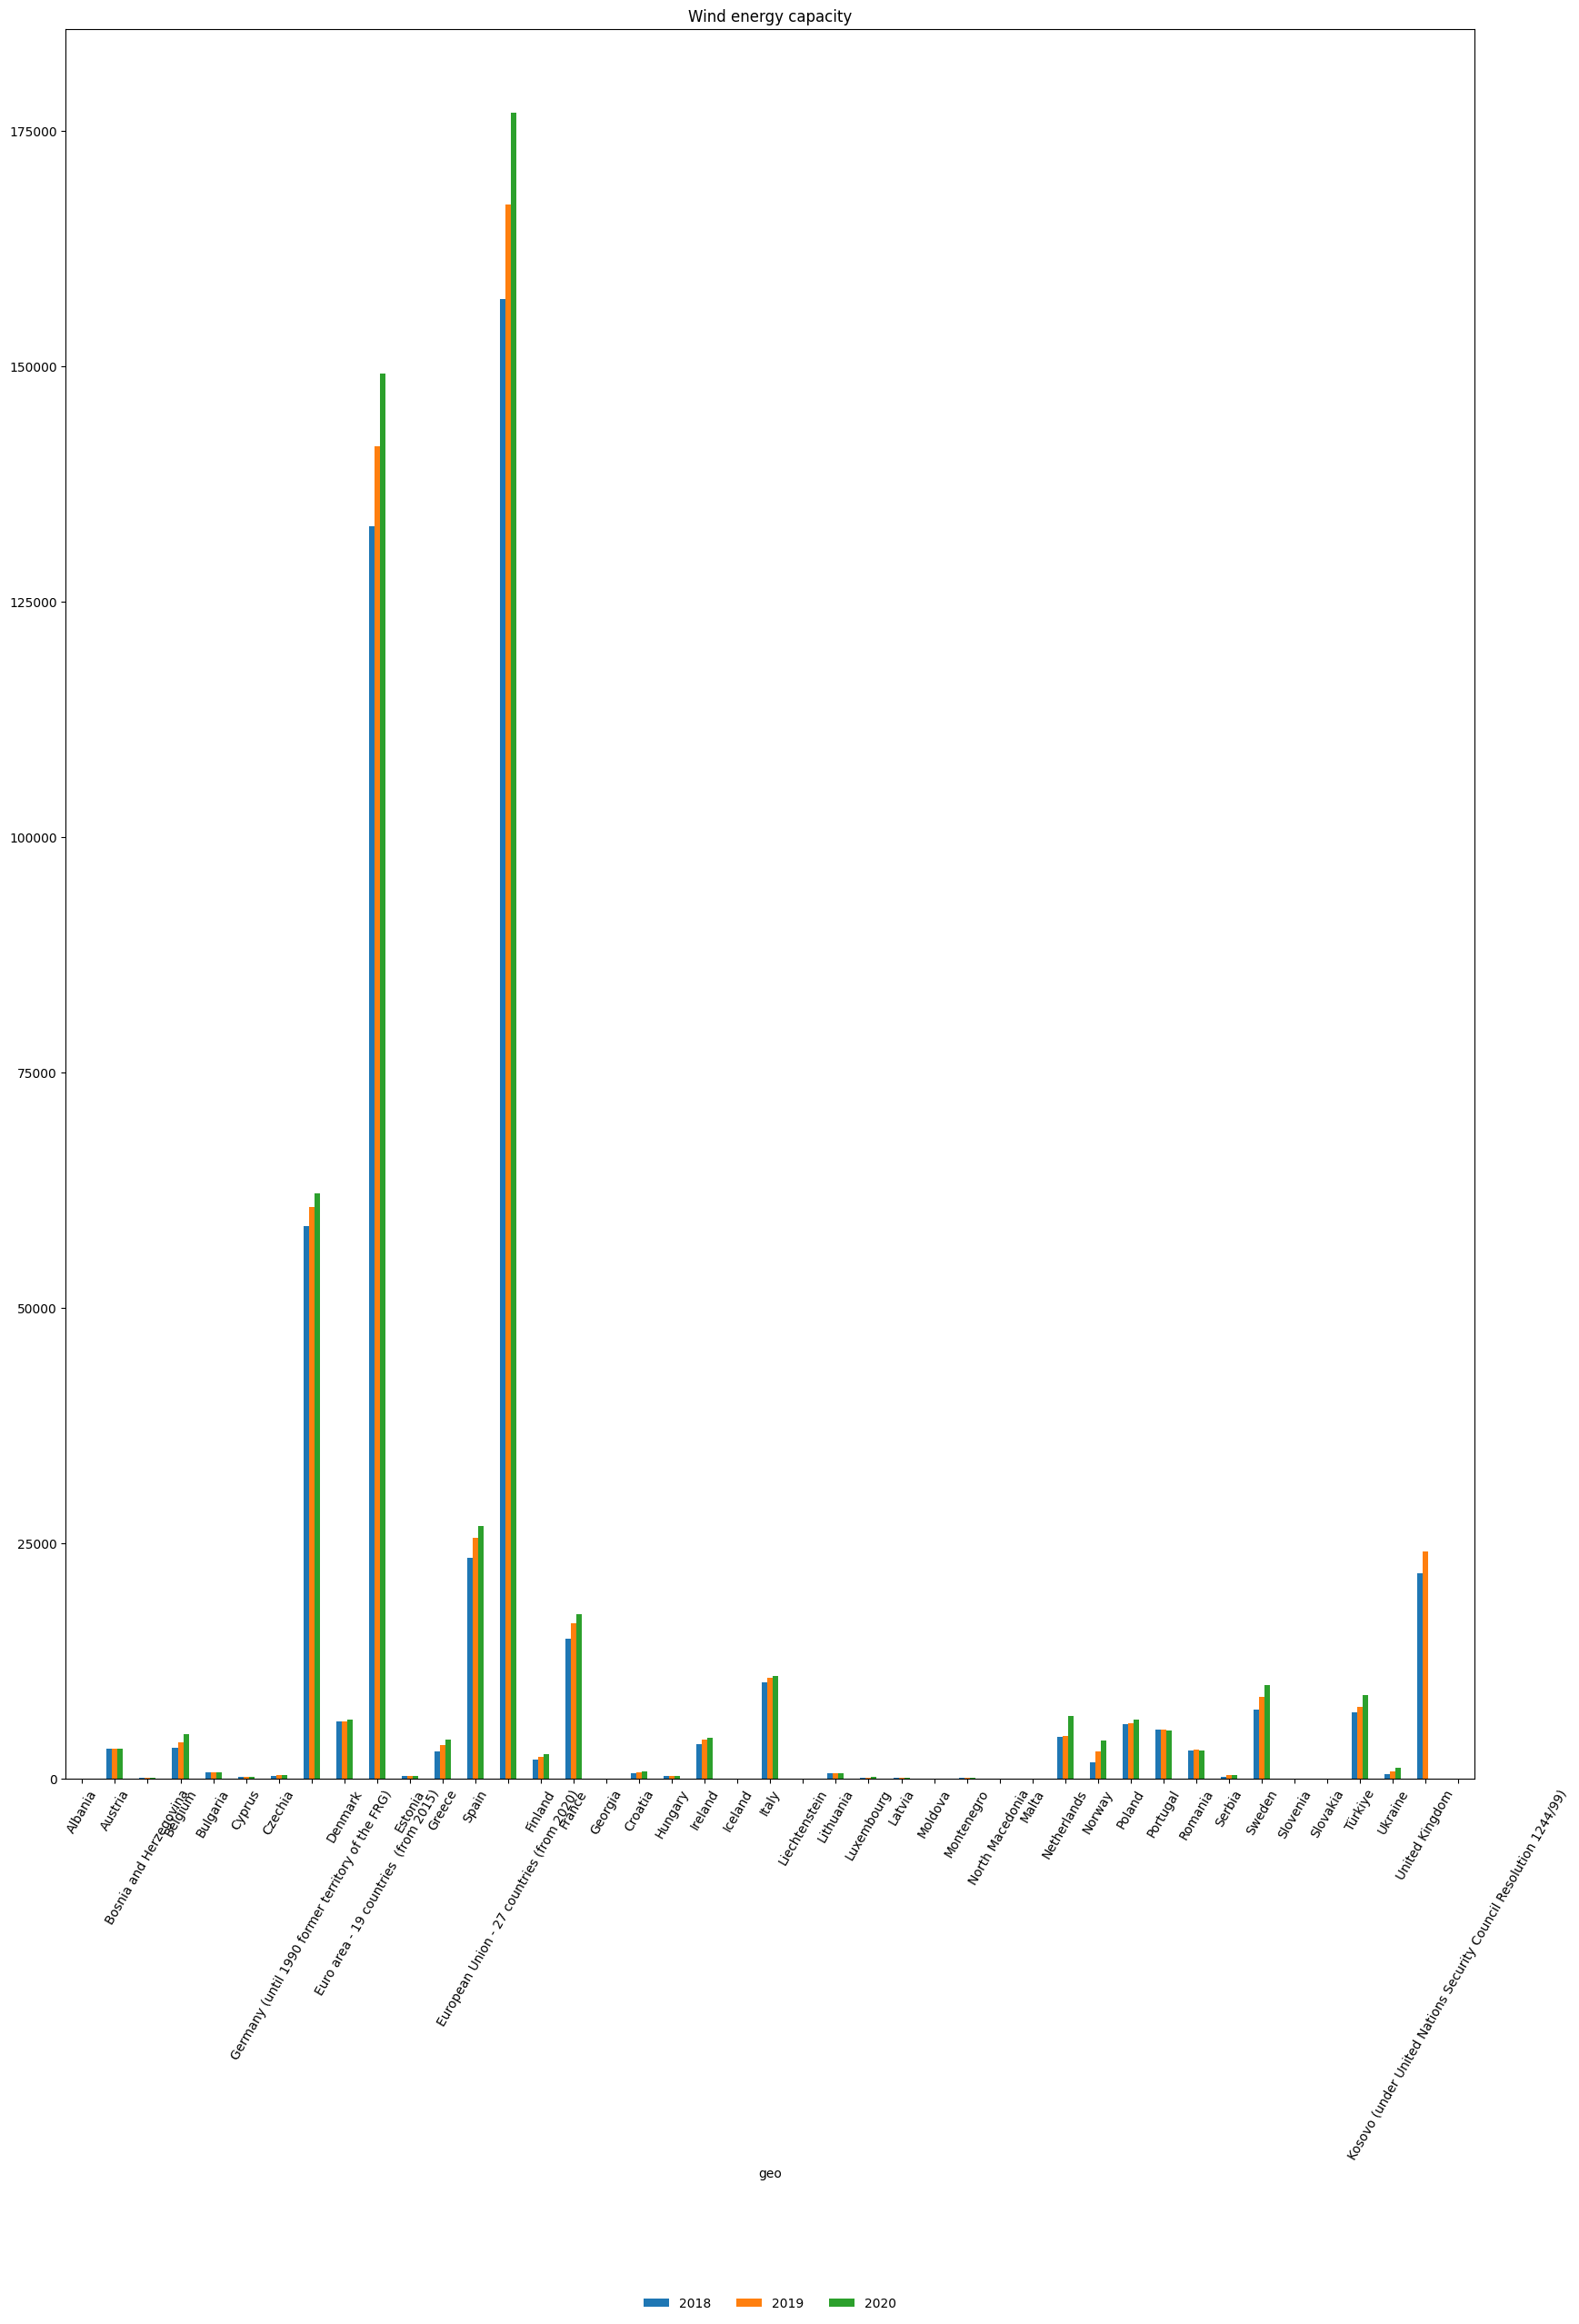

In [48]:

df_get_energy_wind_threeyears = df_get_energy_wind_true.loc['Albania':'Kosovo (under United Nations Security Council Resolution 1244/99)', '2018':'2020']

ax = df_get_energy_wind_threeyears.plot(
    kind='bar', rot=0, xlabel='geo', ylabel='',
    figsize=(8, 1.5), title='Wind energy capacity'
)

ax.tick_params(axis='x', labelrotation = 60)

ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)

ax.figure.set_size_inches(20, 25) 

TypeError: 'DataFrame' object is not callable

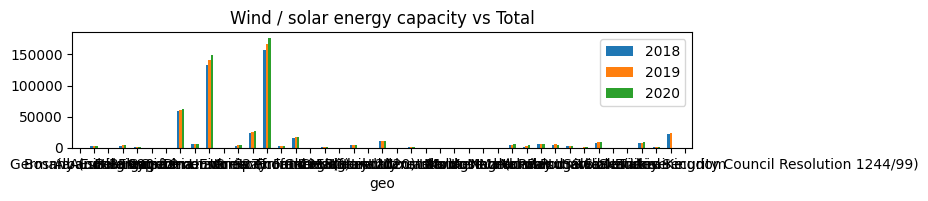

In [49]:
ax = df_get_energy_wind_threeyears.plot(
    kind='bar', rot=0, xlabel='geo', ylabel='',
    figsize=(8, 1.5), title='Wind / solar energy capacity vs Total'
)
df_get_energy_solar_threeyears(ax=ax) 
df_get_renew_fincon_total_threeyears(ax=ax)

ax.tick_params(axis='x', labelrotation = 90)

ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)

ax.figure.set_size_inches(20, 25) 

In [50]:
df_get_energy_wind_2020 = df_get_energy_wind_threeyears[['2020']]
df_get_energy_wind_2020.head()

,2020
geo,
Albania,0.000
Austria,3225.985
Bosnia and Herzegovina,87.000
Belgium,4680.900
Bulgaria,702.800


In [51]:
df_get_renew_2020 = df_get_renew_fincon_total_threeyears[['2020']]
df_get_renew_2020.head()

,2020
geo,
Albania,21474.051
Austria,288624.871
Bosnia and Herzegovina,46804.808
Belgium,360985.528
Bulgaria,110633.154


In [52]:
df_get_energy_wind_2020_GWh = pd.DataFrame(df_get_energy_wind_2020['2020'].multiply(8.76))
df_get_energy_wind_2020_GWh

,2020
geo,
Albania,0.000000e+00
Austria,2.825963e+04
Bosnia and Herzegovina,7.621200e+02
Belgium,4.100468e+04
Bulgaria,6.156528e+03
Cyprus,1.381671e+03
Czechia,2.973354e+03
Germany (until 1990 former territory of the FRG),5.447669e+05
Denmark,5.483283e+04


In [53]:
dfs = df_get_renew_2020.merge(df_get_energy_wind_2020_GWh, on='geo').merge(df_get_energy_solar_2020_GWh, on='geo')

dfs


,2020_x,2020_y,2020
geo,,,
Albania,2.147405e+04,0.000000e+00,1.839600e+02
Austria,2.886249e+05,2.825963e+04,1.789610e+04
Bosnia and Herzegovina,4.680481e+04,7.621200e+02,3.056364e+02
Belgium,3.609855e+05,4.100468e+04,4.883525e+04
Bulgaria,1.106332e+05,6.156528e+03,9.612847e+03
Cyprus,1.777713e+04,1.381671e+03,2.007214e+03
Czechia,2.762517e+05,2.973354e+03,1.859495e+04
Germany (until 1990 former territory of the FRG),2.251765e+06,5.447669e+05,4.705960e+05
Denmark,1.527109e+05,5.483283e+04,1.142562e+04


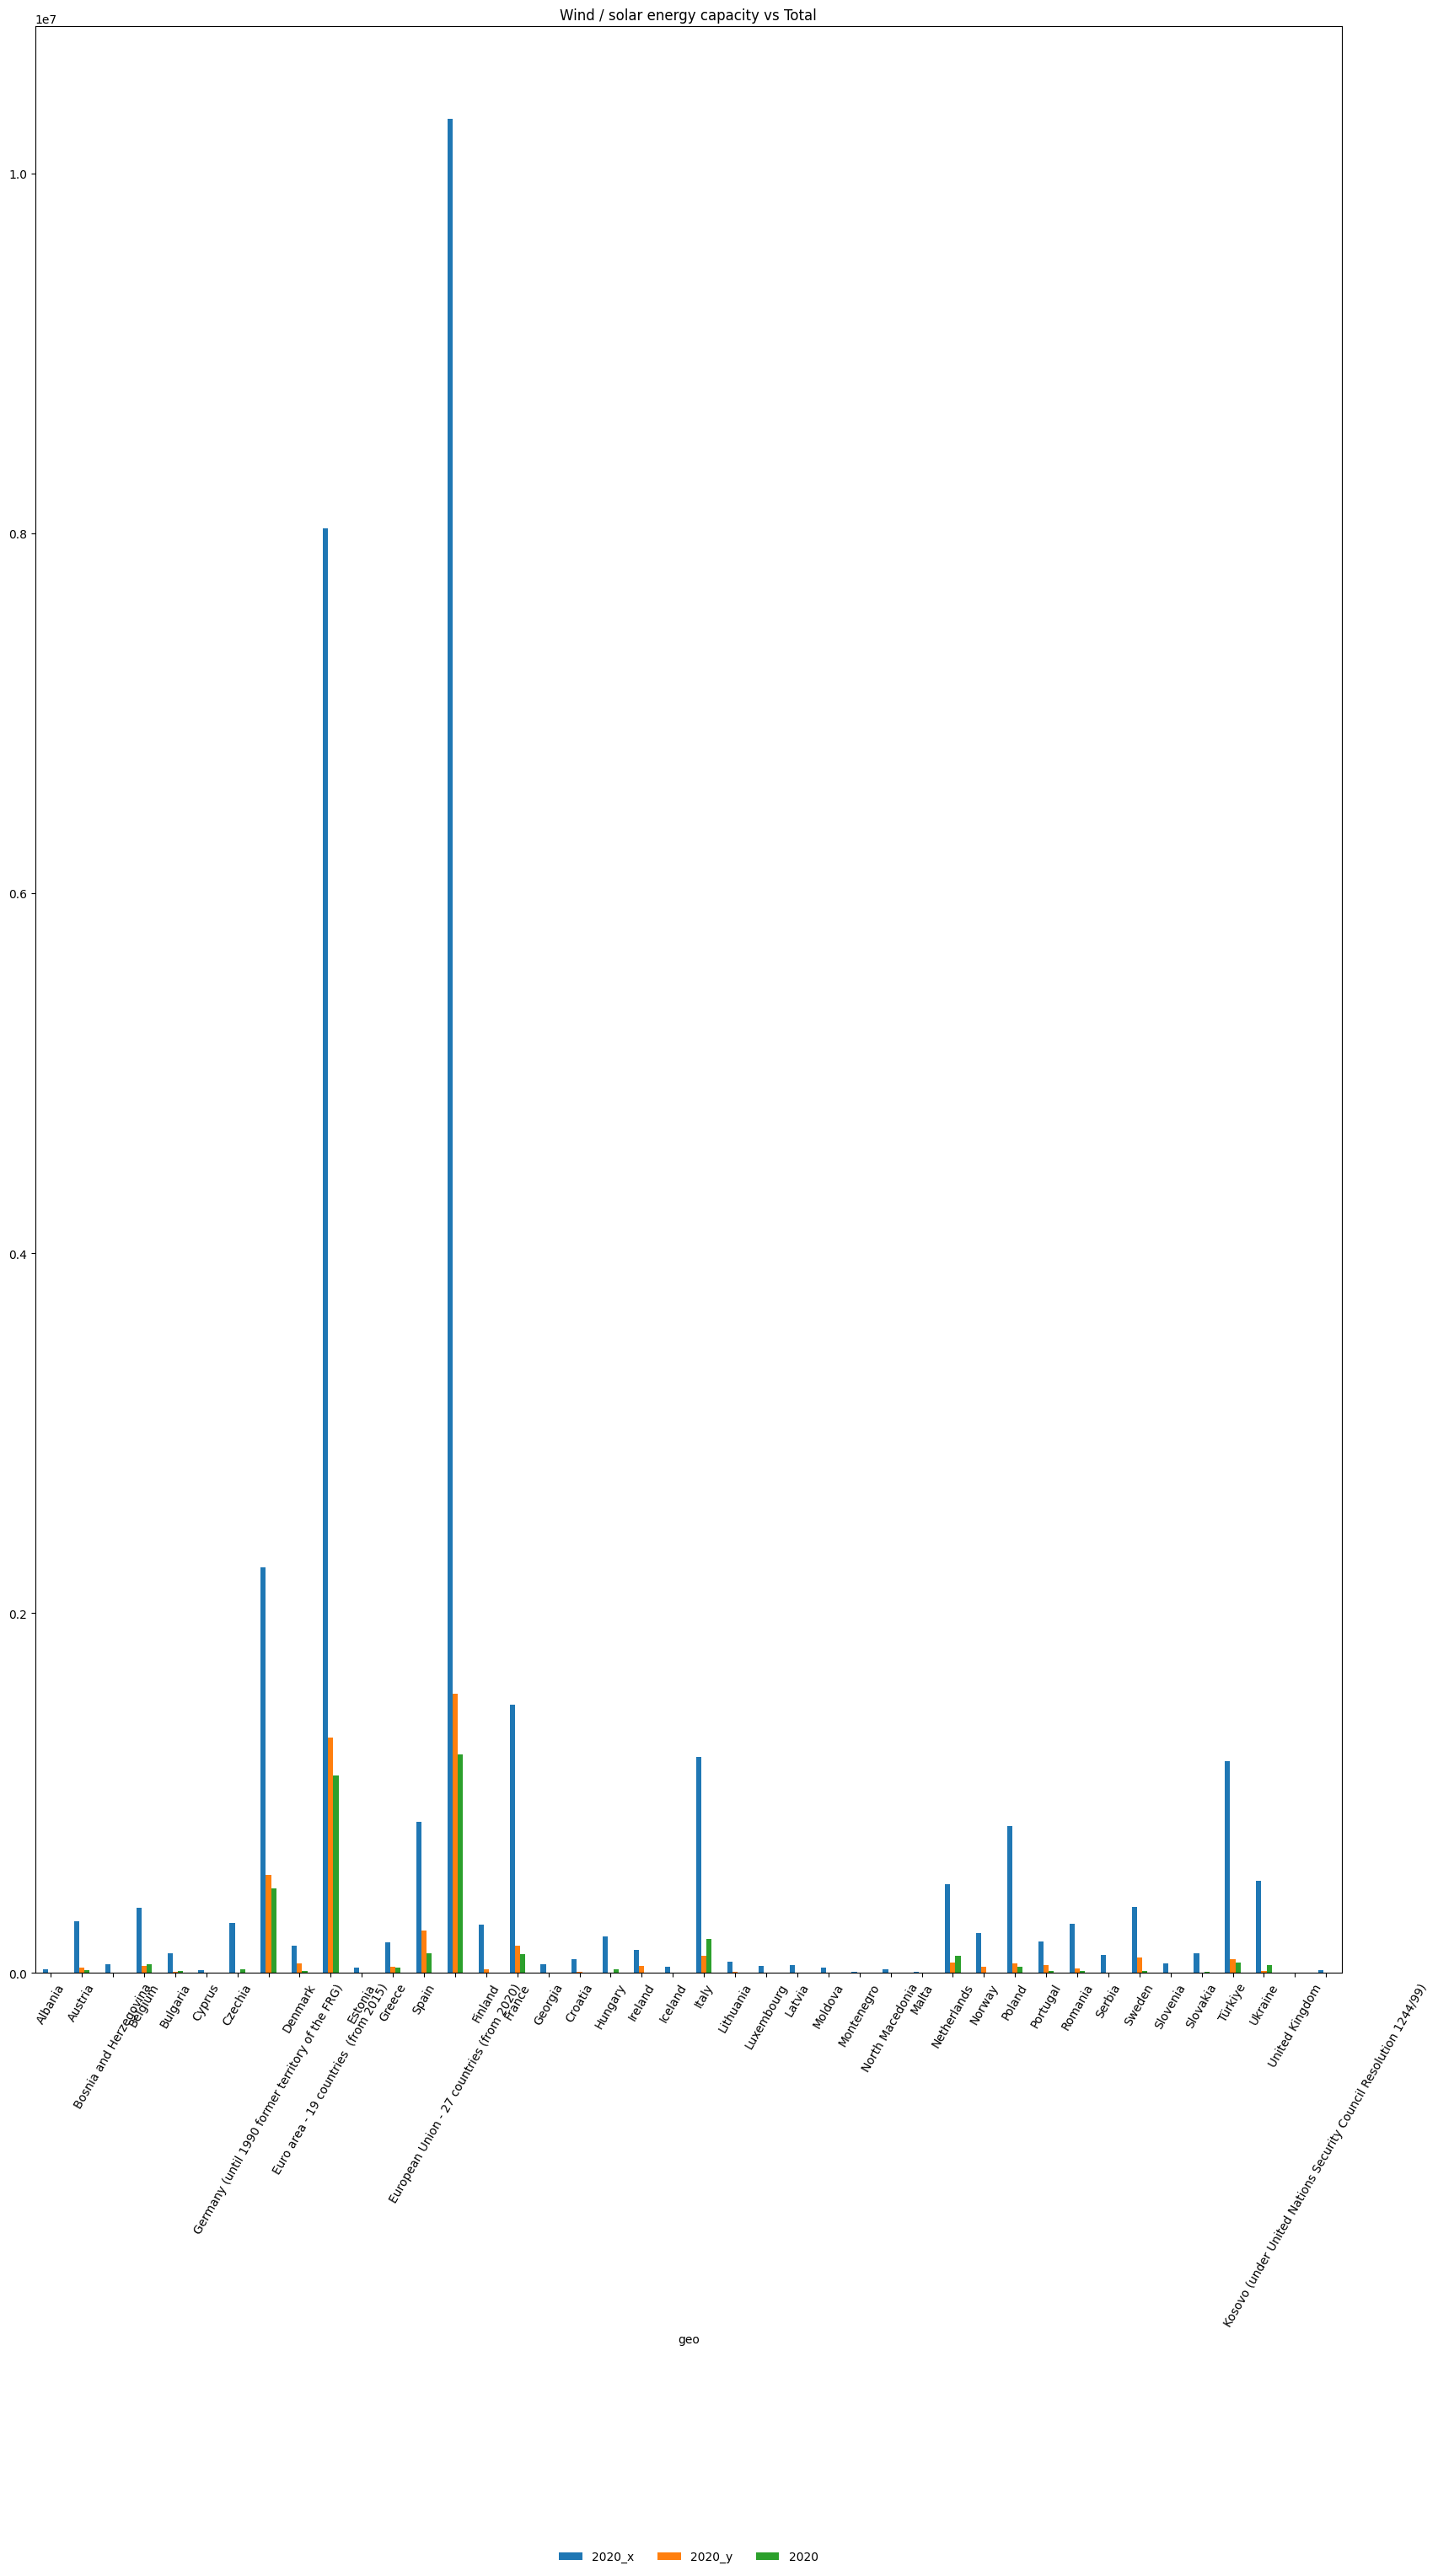

In [54]:
ax = dfs.plot(
    kind='bar', rot=0, xlabel='geo', ylabel='',
    figsize=(8, 1.5), title='Wind / solar energy capacity vs Total'
)

ax.tick_params(axis='x', labelrotation = 60)

ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)

ax.figure.set_size_inches(20, 30) 